# Actividad - Regresión Lineal

* **Nombre:** Juan Carlos Calderón García
* **Matrícula:** A01625696

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv("presion.csv")
df.head(6)

Age  Average of ap_hi  Average of ap_lo
0   30        112.500000         72.500000
1   39        119.029340         88.229829
2   40        119.789630         85.858889
3   41        121.490862         90.344648
4   42        120.163872         89.887957
5   43        141.294203         93.388406

El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

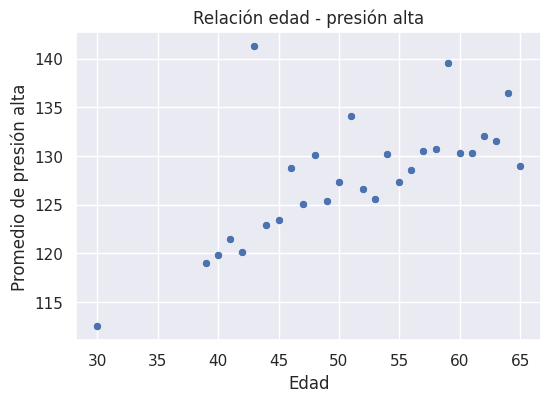

In [5]:
# Grafica la información de la edad y presión alta
fig = plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Age", y="Average of ap_hi")

plt.xlabel("Edad")
plt.ylabel("Promedio de presión alta")
plt.title("Relación edad - presión alta");

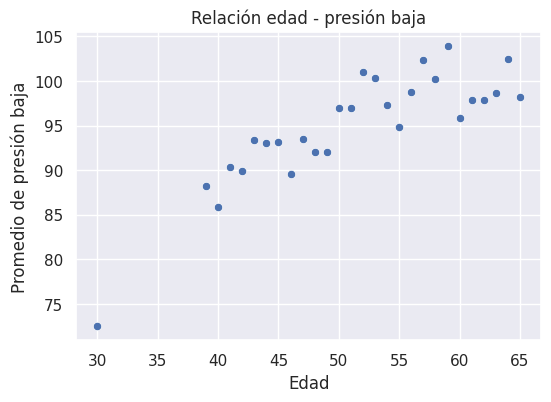

In [6]:
# Grafica la información de la edad y presión baja
fig = plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Age", y="Average of ap_lo")

plt.xlabel("Edad")
plt.ylabel("Promedio de presión baja")
plt.title("Relación edad - presión baja");

Genera una regresión líneal para obtener una aproximación de la ecuación
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [9]:
x = df["Age"]
y_h = df["Average of ap_hi"]
y_l = df["Average of ap_lo"]
xfit = np.linspace(30, 65, 1000)

In [34]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
model_h = LinearRegression(fit_intercept=True);

model_h.fit(x[:,np.newaxis], y_h);

print("Pendiente del modelo:    ", model_h.coef_[0])
print("intercección del modelo: ", model_h.intercept_)

Pendiente del modelo:     0.47769702977669154
intercección del modelo:  103.3969740964366


<ipython-input-34-905dbc12b89b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model_h.fit(x[:,np.newaxis], y_h);


In [35]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
model_l = LinearRegression(fit_intercept=True);

model_l.fit(x[:,np.newaxis], y_l);

print("Pendiente del modelo:    ", model_l.coef_[0])
print("intercección del modelo: ", model_l.intercept_)

Pendiente del modelo:     0.6089810580238237
intercección del modelo:  63.726200409422745


<ipython-input-35-28e44cbbcf45>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model_l.fit(x[:,np.newaxis], y_l);


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde)

In [44]:
# Presión alta
yfit_h = model_h.predict(xfit[:,np.newaxis]);

plt.scatter(x,y_h);
plt.plot(xfit, yfit_h, color="black");
plt.plot(np.vstack([x,x]), np.vstack([y_h, model_h.predict(x[:, np.newaxis])]), color="green");

plt.xlabel("Edad")
plt.ylabel("Promedio de presión alta")
plt.title("Regresión lienal de presión alta");

<ipython-input-44-611eced50bf3>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x,x]), np.vstack([y_h, model_h.predict(x[:, np.newaxis])]), color="green");


<ipython-input-45-35ba69618b34>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x,x]), np.vstack([y_l, model_l.predict(x[:, np.newaxis])]), color="green");


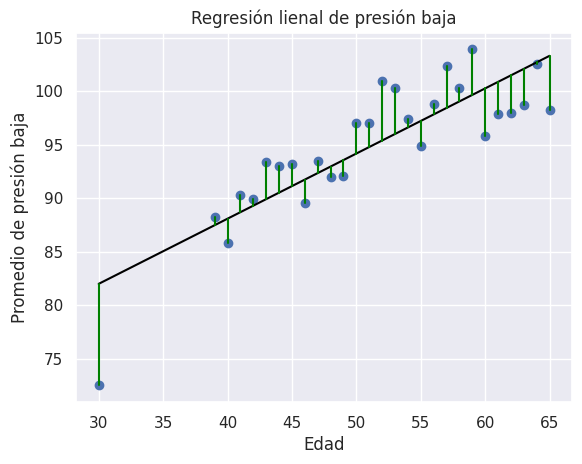

In [45]:
# Presión baja
yfit_l = model_l.predict(xfit[:,np.newaxis]);

plt.scatter(x,y_l);
plt.plot(xfit, yfit_l, color="black");
plt.plot(np.vstack([x,x]), np.vstack([y_l, model_l.predict(x[:, np.newaxis])]), color="green");

plt.xlabel("Edad")
plt.ylabel("Promedio de presión alta")
plt.title("Regresión lienal de presión alta");

plt.xlabel("Edad")
plt.ylabel("Promedio de presión baja")
plt.title("Regresión lienal de presión baja");

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [42]:
def pressure_low(age):
  return  model_h.predict([[age]])[0]

query_age= 76
pressure_low(query_age)

139.70194835946515

In [43]:
def pressure_high(age):
  return model_l.predict([[age]])[0]

query_age= 76
pressure_high(query_age)

110.00876081923334